<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/

In [2]:
# Load the model
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

2019-10-14 16:37:23 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


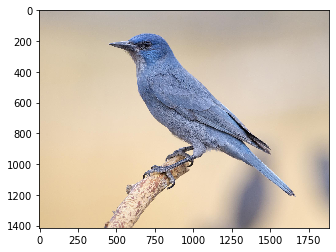

In [3]:
# Load the Image
from PIL import Image
import matplotlib.pyplot as plt
import torch
%matplotlib inline
 
!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('./bird.png')
plt.imshow(img); plt.show()

In [4]:
# Pre-process the image
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

In [5]:
# Forward pass through network
import numpy as np
out = fcn(inp)['out']
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()

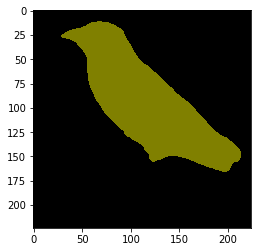

In [6]:
# Decode Output
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
                             # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
                             (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
                             # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
                             (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
                             # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
                             (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
                             # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
                             (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
   
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
     
    rgb = np.stack([r, g, b], axis=2)
    return rgb

rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

2019-10-14 16:37:26 URL:https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg [6604923/6604923] -> "horse.png" [1]


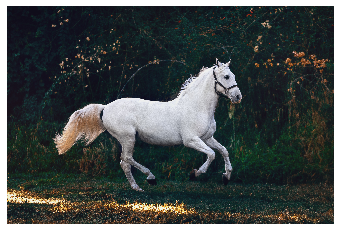

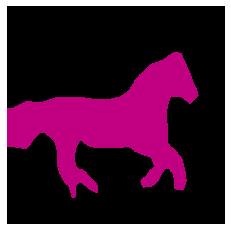

In [7]:
# Final Result
def segment(net, path, show_orig=True):
    img = Image.open(path)
    if show_orig:
        plt.imshow(img) 
        plt.axis('off')
        plt.show()
    # Comment the Resize and CenterCrop for better inference results
    trf = T.Compose([T.Resize(256), 
                     T.CenterCrop(224), 
                     T.ToTensor(), 
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    inp = trf(img).unsqueeze(0)
    out = net(inp)['out']
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    rgb = decode_segmap(om)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
segment(fcn, './horse.png')

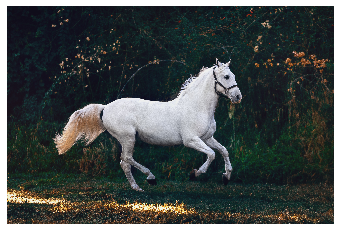

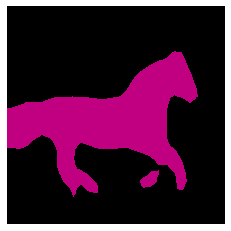

In [8]:
# Semantic Segmentation using DeepLab
segment(dlab, './horse.png')

2019-10-14 16:37:32 URL:https://images.pexels.com/photos/2385051/pexels-photo-2385051.jpeg [5704841/5704841] -> "dog-park.png" [1]


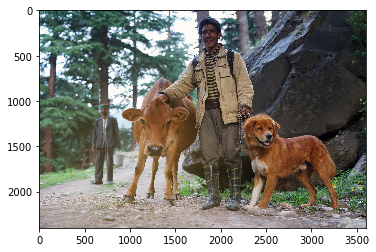

Segmenatation Image on FCN


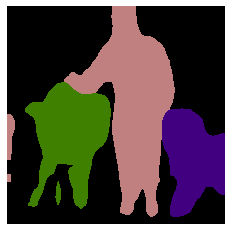

Segmenatation Image on DeepLabv3


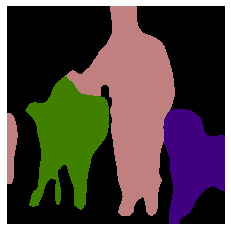

In [9]:
!wget -nv "https://images.pexels.com/photos/2385051/pexels-photo-2385051.jpeg" -O dog-park.png
img = Image.open('./dog-park.png')
plt.imshow(img); plt.show()
 
print ('Segmenatation Image on FCN')
segment(fcn, path='./dog-park.png', show_orig=False)
 
print ('Segmenatation Image on DeepLabv3')
segment(dlab, path='./dog-park.png', show_orig=False)